In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from tabulate import tabulate 

In [52]:
df = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\bit\dataset\fitness_tracker_dataset.csv")
df

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired


In [53]:
#check missing values 
df.isnull().sum()

user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          143120
weather_conditions         0
location                   0
mood                       0
dtype: int64

In [54]:
df.shape

(1000000, 12)

In [55]:
# General summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        856880 non-null   object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 91.6+ MB
None
              user_id           steps  calories_burned     distance_km  \
count  1000000.000000  1000000.0

In [56]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [57]:
# 1. Average steps per day
avg_steps = df['steps'].mean()
print(f"Average steps per day: {avg_steps:.2f}")


Average steps per day: 15005.77


In [58]:
# 2. Total distance covered
total_distance = df['distance_km'].sum()
print(f"Total distance covered: {total_distance:.2f} km")

Total distance covered: 9994464.50 km


In [59]:
# 3. Correlation between steps and calories burned
correlation = df[['steps', 'calories_burned']].corr()
print("Correlation between steps and calories burned:\n", correlation)

Correlation between steps and calories burned:
                     steps  calories_burned
steps            1.000000         0.000039
calories_burned  0.000039         1.000000


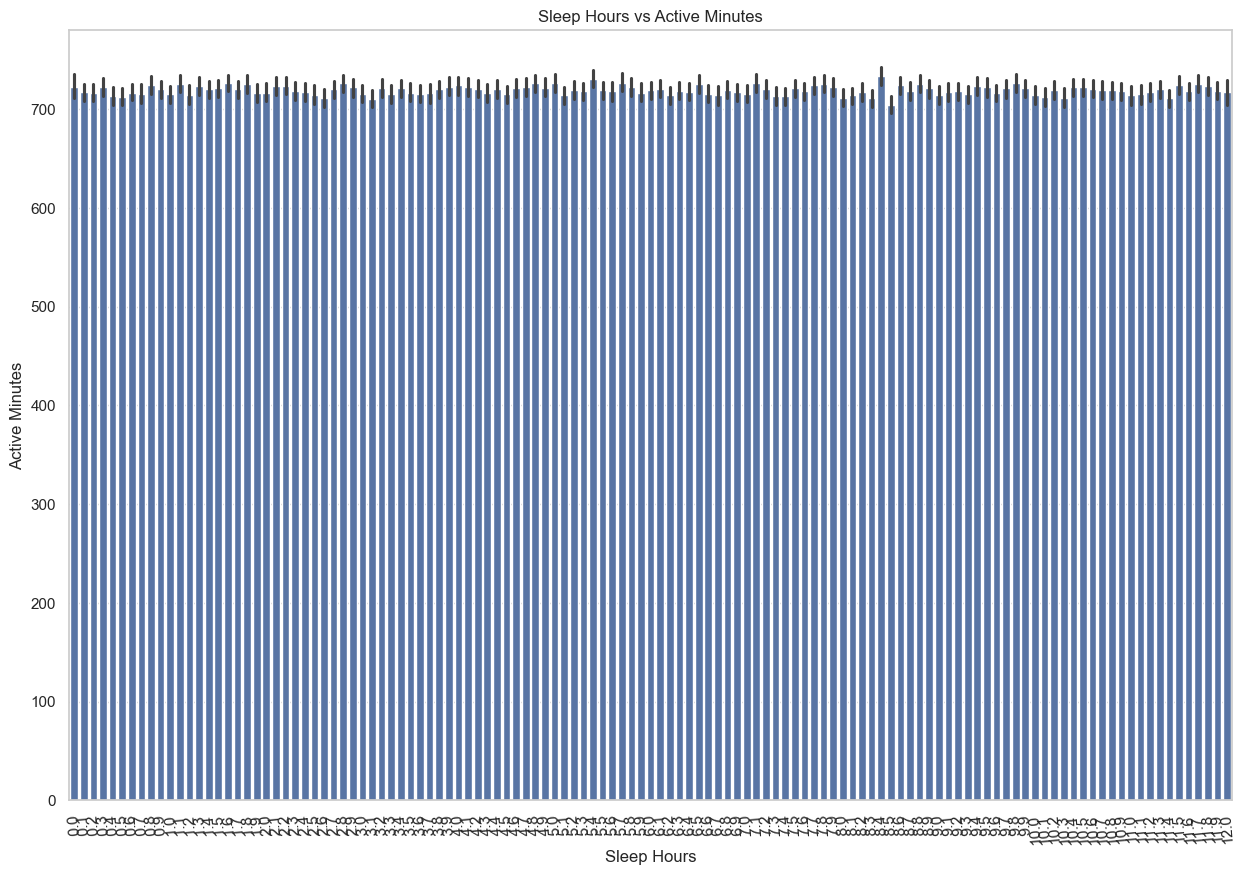

In [60]:
# 4. Relationship between sleep hours and active minutes
plt.figure(figsize=(15, 10))
sns.barplot(x=df['sleep_hours'], y=df['active_minutes'])
plt.title("Sleep Hours vs Active Minutes")
plt.xlabel("Sleep Hours")
plt.ylabel("Active Minutes")
plt.xticks(rotation=95)
plt.show()

In [61]:
# 5. Average heart rate during different workout types
heart_rate_avg = df.groupby("workout_type")["heart_rate_avg"].mean()
print("Average heart rate by workout type:\n", heart_rate_avg)

Average heart rate by workout type:
 workout_type
Cycling        119.415498
Gym Workout    119.674435
Running        119.603282
Swimming       119.443226
Walking        119.211505
Yoga           119.392081
Name: heart_rate_avg, dtype: float64


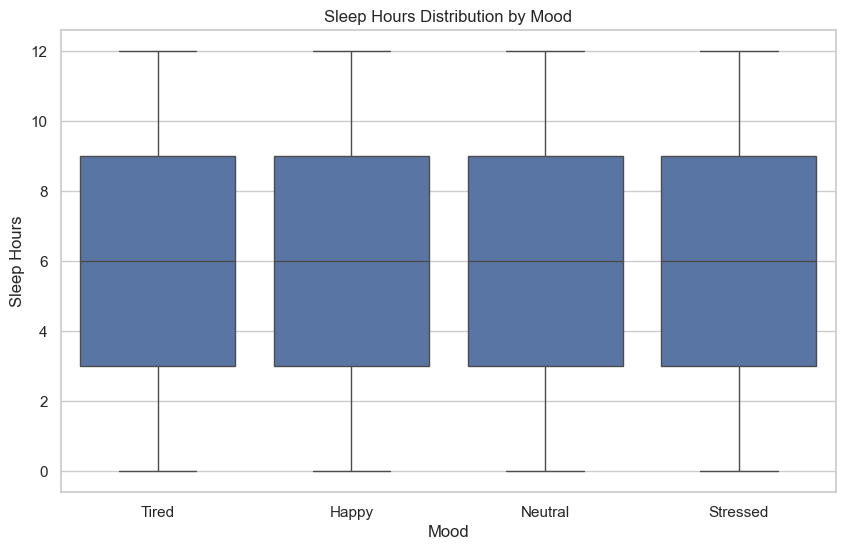

In [62]:
# 6. Mood analysis based on sleep hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mood'], y=df['sleep_hours'])
plt.title("Sleep Hours Distribution by Mood")
plt.xlabel("Mood")
plt.ylabel("Sleep Hours")
plt.show()

Visualize how your step count changes over time.

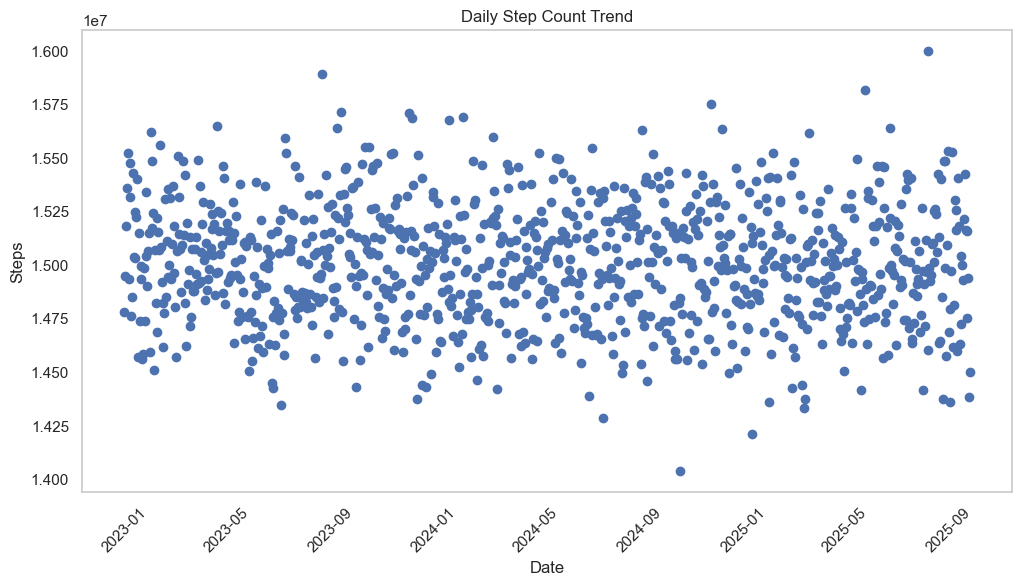

In [63]:
# Group by date and sum steps
daily_steps = df.groupby('date')['steps'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(daily_steps, marker='o', linestyle='', color='b')
plt.title("Daily Step Count Trend")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.xticks(rotation=45)
plt.grid()
plt.show()

How steps relate to calories burned and activity level.

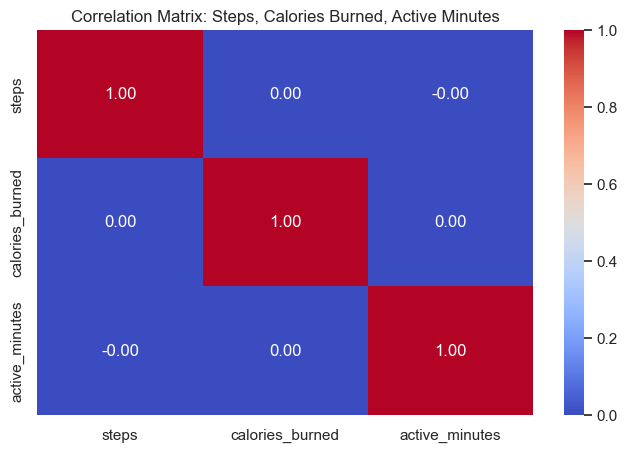

In [64]:
# Compute correlation matrix
corr_matrix = df[['steps', 'calories_burned', 'active_minutes']].corr()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Steps, Calories Burned, Active Minutes")
plt.show()

How does weather affect physical activity?

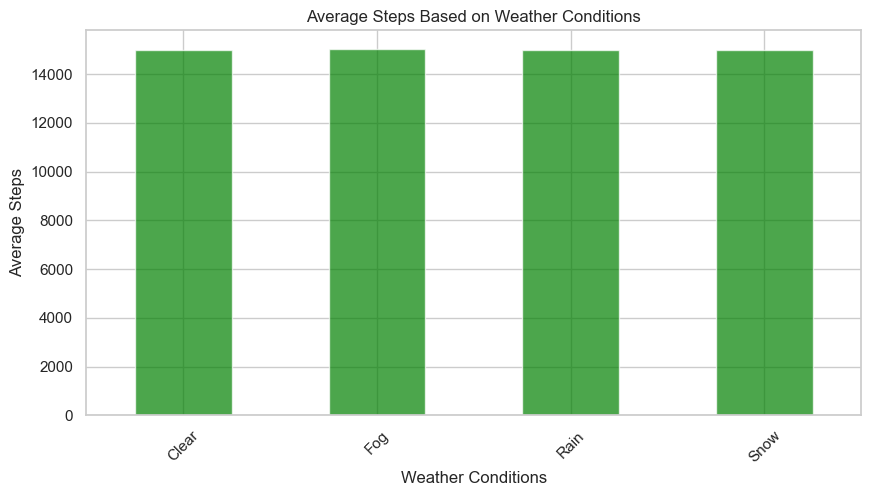

In [65]:
# Group by weather condition and calculate the average steps
weather_steps = df.groupby('weather_conditions')['steps'].mean()

# Bar plot
plt.figure(figsize=(10, 5))
weather_steps.plot(kind='bar', color='green', alpha=0.7)
plt.title("Average Steps Based on Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.show()

How does heart rate vary with different workouts?

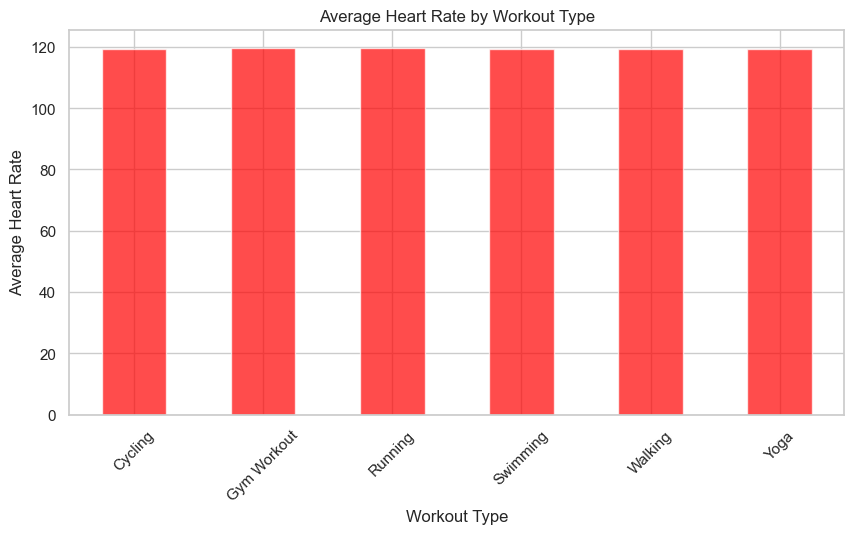

In [66]:
# Group by workout type and get average heart rate
workout_heart_rate = df.groupby('workout_type')['heart_rate_avg'].mean()

# Bar plot
plt.figure(figsize=(10, 5))
workout_heart_rate.plot(kind='bar', color='red', alpha=0.7)
plt.title("Average Heart Rate by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Average Heart Rate")
plt.xticks(rotation=45)
plt.show()

How does sleep affect mood?

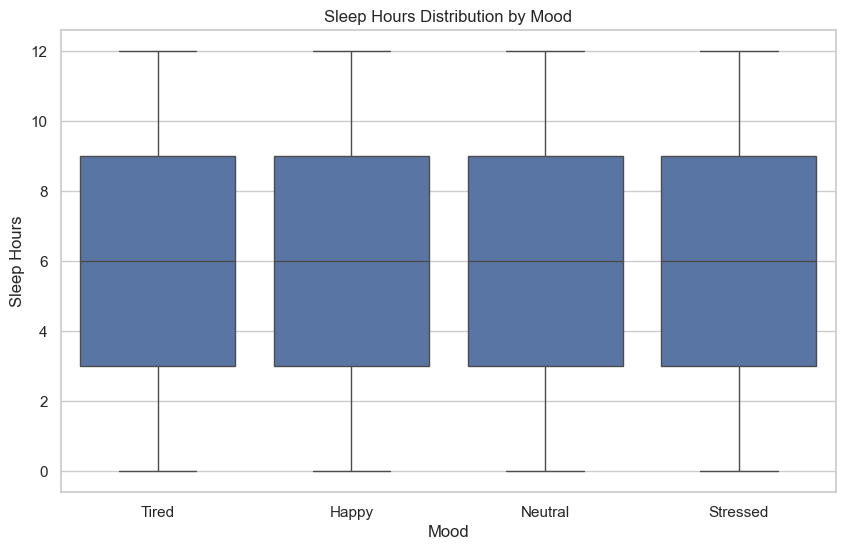

In [67]:
# Box plot to see sleep distribution across moods
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mood'], y=df['sleep_hours'])
plt.title("Sleep Hours Distribution by Mood")
plt.xlabel("Mood")
plt.ylabel("Sleep Hours")
plt.show()

How does your activity level change across different days of the week?

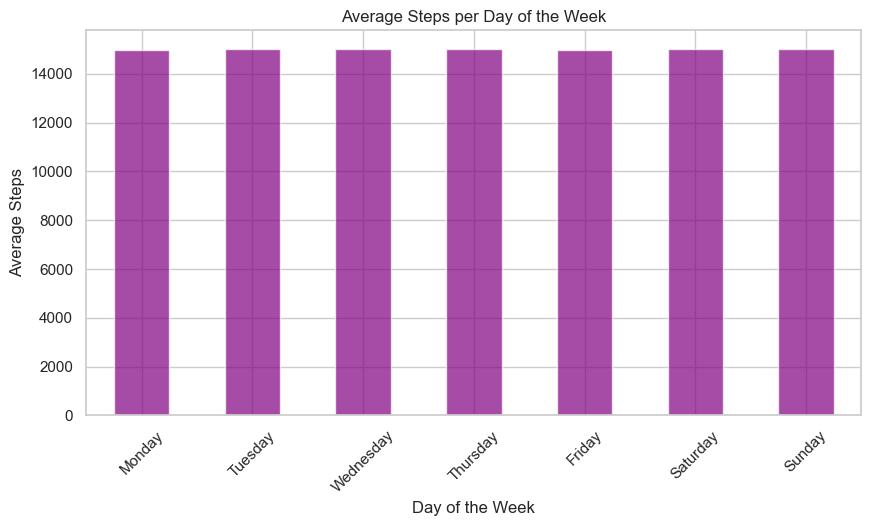

In [68]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Group by day and calculate the average steps
weekly_steps = df.groupby('day_of_week')['steps'].mean()

# Reorder days for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_steps = weekly_steps.reindex(days_order)

# Bar plot
plt.figure(figsize=(10, 5))
weekly_steps.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Average Steps per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.show()